# US Birth Rate Analysis
#By- Aarush Kumar
#Dated: Sept. 21,2021

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Extraction

In [2]:
df = pd.read_csv('/home/aarush100616/Downloads/Projects/US Birth Rate Analysis/Data/US_births_2000-2014_SSA.csv')

In [3]:
df

year  month  date_of_month  day_of_week  births
0     2000      1              1            6    9083
1     2000      1              2            7    8006
2     2000      1              3            1   11363
3     2000      1              4            2   13032
4     2000      1              5            3   12558
...    ...    ...            ...          ...     ...
5474  2014     12             27            6    8656
5475  2014     12             28            7    7724
5476  2014     12             29            1   12811
5477  2014     12             30            2   13634
5478  2014     12             31            3   11990

[5479 rows x 5 columns]

In [4]:
df.shape

(5479, 5)

In [5]:
df.size

27395

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           5479 non-null   int64
 1   month          5479 non-null   int64
 2   date_of_month  5479 non-null   int64
 3   day_of_week    5479 non-null   int64
 4   births         5479 non-null   int64
dtypes: int64(5)
memory usage: 214.1 KB


In [7]:
df.isnull().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

In [8]:
df.dtypes

year             int64
month            int64
date_of_month    int64
day_of_week      int64
births           int64
dtype: object

In [9]:
df.describe()

year        month  date_of_month  day_of_week        births
count  5479.000000  5479.000000    5479.000000  5479.000000   5479.000000
mean   2006.999270     6.522723      15.730243     3.999817  11350.068261
std       4.321085     3.449075       8.801151     2.000502   2325.821049
min    2000.000000     1.000000       1.000000     1.000000   5728.000000
25%    2003.000000     4.000000       8.000000     2.000000   8740.000000
50%    2007.000000     7.000000      16.000000     4.000000  12343.000000
75%    2011.000000    10.000000      23.000000     6.000000  13082.000000
max    2014.000000    12.000000      31.000000     7.000000  16081.000000

In [10]:
df.describe().T

count          mean          std     min     25%      50%  \
year           5479.0   2006.999270     4.321085  2000.0  2003.0   2007.0   
month          5479.0      6.522723     3.449075     1.0     4.0      7.0   
date_of_month  5479.0     15.730243     8.801151     1.0     8.0     16.0   
day_of_week    5479.0      3.999817     2.000502     1.0     2.0      4.0   
births         5479.0  11350.068261  2325.821049  5728.0  8740.0  12343.0   

                   75%      max  
year            2011.0   2014.0  
month             10.0     12.0  
date_of_month     23.0     31.0  
day_of_week        6.0      7.0  
births         13082.0  16081.0

Text(0.5, 1.0, 'Pearson Correlation')

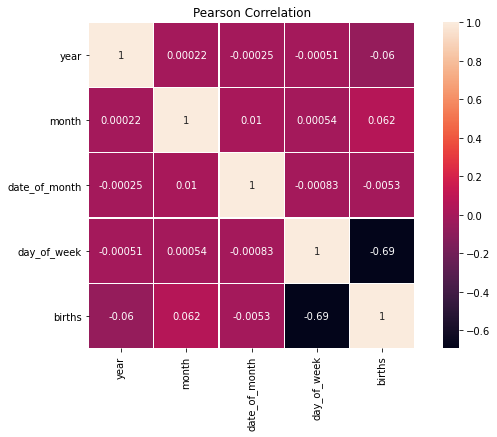

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(df.astype(float).corr(), linewidths = 0.25, vmax = 1.0, square = True, annot = True)
plt.title("Pearson Correlation")

## Linear Regression Model

In [12]:
#split data
X = df.drop('births', axis = 1)
y = df['births']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3835, 4)
(3835,)
(1644, 4)
(1644,)


In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
%time linreg.fit(X_train, y_train)

CPU times: user 49.5 ms, sys: 34 ms, total: 83.6 ms
Wall time: 30 ms


LinearRegression()

In [14]:
#prediction
y_pred = linreg.predict(X_test)
print(y_pred)

[11259.3601463  10382.7739477  13740.09175018 ... 13750.25259333
 11257.54904601 11632.61682674]


In [15]:
#result
result = pd.DataFrame({'Actual' : y_test, 'Prediction' : y_pred})
result.head()

Actual    Prediction
5395   12130  11259.360146
2645   13138  10382.773948
2711   12711  13740.091750
1724   12963  13932.324609
1736    8886   9997.593686

In [16]:
#check MAE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))

Mean Absolute Error :  1368.83


In [17]:
#check MSE
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))

Mean Squared Error :  2646578.35


In [18]:
#check RMSE
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Root Mean Squared Error :  36.997702631379696


In [19]:
#check r2 score
print('r2_score : ', metrics.r2_score(y_test, y_pred))

r2_score :  0.5074624540413547


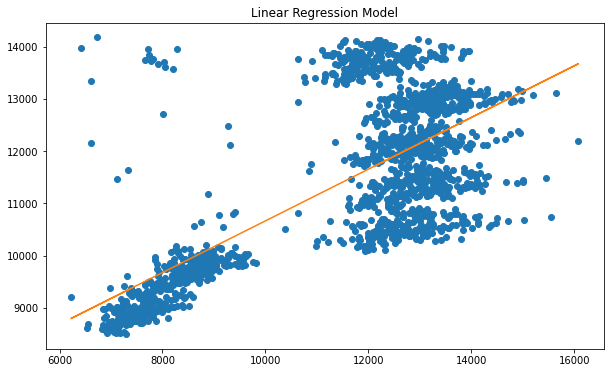

In [20]:
#visualization model
x = y_test
y = y_pred

plt.figure(figsize = (10,6))
plt.plot(x, y, 'o')
plt.title("Linear Regression Model")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


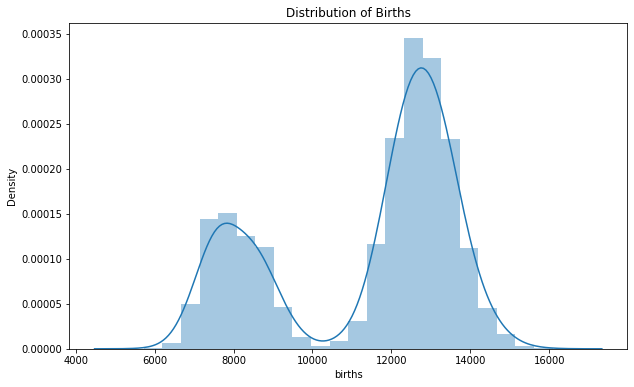

In [21]:
#distribution
plt.figure(figsize = (10,6))
sns.distplot(df['births'])
plt.title("Distribution of Births")
plt.show()

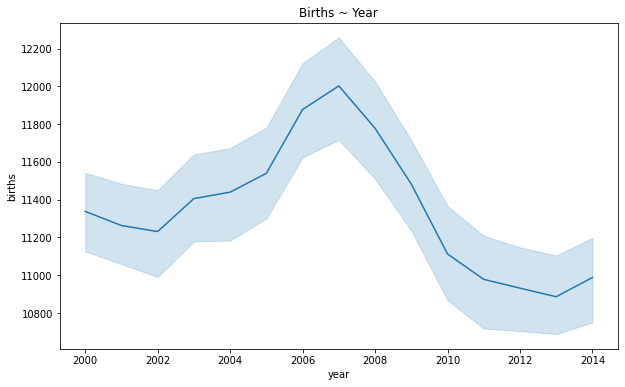

In [22]:
#trend birth by year
plt.figure(figsize = (10,6))
sns.lineplot(data = df, x = 'year', y = 'births')
plt.title("Births ~ Year")
plt.show()